## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.589349 -0.179905 -0.561954  0.633825  0.465956 -0.614552
1  0.093804 -0.499964 -1.997937  0.502399  0.382585  1.206897
2  1.378121  0.793166 -0.462298  0.011977 -1.067221  0.559207
3 -0.546554 -1.025317  0.852258 -1.147255 -0.950455 -1.723960
4 -1.527090  1.027034  0.855486  0.046656 -0.292195 -0.845935


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0274974	total: 68.8ms	remaining: 1m 8s
1:	learn: 1.0175865	total: 69.4ms	remaining: 34.7s
2:	learn: 1.0052526	total: 70ms	remaining: 23.3s
3:	learn: 0.9946880	total: 70.6ms	remaining: 17.6s
4:	learn: 0.9817869	total: 71.1ms	remaining: 14.2s
5:	learn: 0.9724460	total: 71.7ms	remaining: 11.9s
6:	learn: 0.9601838	total: 72.3ms	remaining: 10.3s
7:	learn: 0.9511307	total: 72.9ms	remaining: 9.04s
8:	learn: 0.9416375	total: 73.4ms	remaining: 8.08s
9:	learn: 0.9321252	total: 74ms	remaining: 7.33s
10:	learn: 0.9214731	total: 74.6ms	remaining: 6.7s
11:	learn: 0.9108206	total: 75.1ms	remaining: 6.19s
12:	learn: 0.9003268	total: 75.7ms	remaining: 5.75s
13:	learn: 0.8915216	total: 76.2ms	remaining: 5.37s
14:	learn: 0.8849028	total: 76.7ms	remaining: 5.04s
15:	learn: 0.8752374	total: 77.2ms	remaining: 4.75s
16:	learn: 0.8662821	total: 77.8ms	remaining: 4.5s
17:	learn: 0.8584908	total: 78.4ms	remaining: 4.28s
18:	learn: 0.8497745	total: 78.8ms	remaining: 4.07

88:	learn: 0.4427878	total: 110ms	remaining: 1.12s
89:	learn: 0.4392345	total: 110ms	remaining: 1.11s
90:	learn: 0.4361052	total: 111ms	remaining: 1.11s
91:	learn: 0.4323906	total: 111ms	remaining: 1.1s
92:	learn: 0.4283354	total: 112ms	remaining: 1.09s
93:	learn: 0.4244948	total: 112ms	remaining: 1.08s
94:	learn: 0.4211414	total: 113ms	remaining: 1.07s
95:	learn: 0.4178302	total: 113ms	remaining: 1.06s
96:	learn: 0.4145258	total: 113ms	remaining: 1.05s
97:	learn: 0.4108784	total: 114ms	remaining: 1.05s
98:	learn: 0.4069599	total: 114ms	remaining: 1.04s
99:	learn: 0.4037161	total: 115ms	remaining: 1.03s
100:	learn: 0.4003931	total: 115ms	remaining: 1.02s
101:	learn: 0.3971580	total: 116ms	remaining: 1.02s
102:	learn: 0.3940968	total: 116ms	remaining: 1.01s
103:	learn: 0.3908043	total: 116ms	remaining: 1s
104:	learn: 0.3878808	total: 117ms	remaining: 996ms
105:	learn: 0.3849420	total: 117ms	remaining: 989ms
106:	learn: 0.3816164	total: 118ms	remaining: 982ms
107:	learn: 0.3787721	total:

254:	learn: 0.1404623	total: 188ms	remaining: 548ms
255:	learn: 0.1396182	total: 188ms	remaining: 547ms
256:	learn: 0.1388386	total: 189ms	remaining: 546ms
257:	learn: 0.1380944	total: 189ms	remaining: 544ms
258:	learn: 0.1371813	total: 190ms	remaining: 543ms
259:	learn: 0.1363822	total: 190ms	remaining: 542ms
260:	learn: 0.1353879	total: 191ms	remaining: 540ms
261:	learn: 0.1346491	total: 191ms	remaining: 539ms
262:	learn: 0.1340076	total: 192ms	remaining: 538ms
263:	learn: 0.1332836	total: 192ms	remaining: 536ms
264:	learn: 0.1325142	total: 193ms	remaining: 535ms
265:	learn: 0.1318409	total: 193ms	remaining: 533ms
266:	learn: 0.1310908	total: 194ms	remaining: 532ms
267:	learn: 0.1302468	total: 194ms	remaining: 531ms
268:	learn: 0.1294638	total: 195ms	remaining: 529ms
269:	learn: 0.1286953	total: 195ms	remaining: 528ms
270:	learn: 0.1277469	total: 196ms	remaining: 526ms
271:	learn: 0.1269837	total: 196ms	remaining: 525ms
272:	learn: 0.1263566	total: 197ms	remaining: 524ms
273:	learn: 

478:	learn: 0.0430885	total: 293ms	remaining: 319ms
479:	learn: 0.0430036	total: 293ms	remaining: 318ms
480:	learn: 0.0429199	total: 294ms	remaining: 317ms
481:	learn: 0.0426443	total: 295ms	remaining: 316ms
482:	learn: 0.0425626	total: 295ms	remaining: 316ms
483:	learn: 0.0425079	total: 295ms	remaining: 315ms
484:	learn: 0.0422063	total: 296ms	remaining: 314ms
485:	learn: 0.0421319	total: 296ms	remaining: 313ms
486:	learn: 0.0420587	total: 297ms	remaining: 313ms
487:	learn: 0.0417639	total: 297ms	remaining: 312ms
488:	learn: 0.0417047	total: 298ms	remaining: 311ms
489:	learn: 0.0416531	total: 298ms	remaining: 310ms
490:	learn: 0.0413916	total: 299ms	remaining: 310ms
491:	learn: 0.0413221	total: 299ms	remaining: 309ms
492:	learn: 0.0412721	total: 299ms	remaining: 308ms
493:	learn: 0.0409876	total: 300ms	remaining: 307ms
494:	learn: 0.0409313	total: 300ms	remaining: 307ms
495:	learn: 0.0408808	total: 301ms	remaining: 306ms
496:	learn: 0.0406021	total: 301ms	remaining: 305ms
497:	learn: 

648:	learn: 0.0227974	total: 371ms	remaining: 201ms
649:	learn: 0.0226704	total: 372ms	remaining: 200ms
650:	learn: 0.0225491	total: 372ms	remaining: 199ms
651:	learn: 0.0224325	total: 373ms	remaining: 199ms
652:	learn: 0.0223093	total: 373ms	remaining: 198ms
653:	learn: 0.0221836	total: 374ms	remaining: 198ms
654:	learn: 0.0220714	total: 374ms	remaining: 197ms
655:	learn: 0.0219519	total: 374ms	remaining: 196ms
656:	learn: 0.0218376	total: 375ms	remaining: 196ms
657:	learn: 0.0217291	total: 375ms	remaining: 195ms
658:	learn: 0.0216110	total: 376ms	remaining: 194ms
659:	learn: 0.0214955	total: 376ms	remaining: 194ms
660:	learn: 0.0213748	total: 377ms	remaining: 193ms
661:	learn: 0.0212657	total: 377ms	remaining: 193ms
662:	learn: 0.0211537	total: 378ms	remaining: 192ms
663:	learn: 0.0210471	total: 378ms	remaining: 191ms
664:	learn: 0.0209464	total: 378ms	remaining: 191ms
665:	learn: 0.0208429	total: 379ms	remaining: 190ms
666:	learn: 0.0207503	total: 379ms	remaining: 189ms
667:	learn: 

871:	learn: 0.0113270	total: 477ms	remaining: 70ms
872:	learn: 0.0112951	total: 478ms	remaining: 69.5ms
873:	learn: 0.0112784	total: 478ms	remaining: 68.9ms
874:	learn: 0.0112223	total: 479ms	remaining: 68.4ms
875:	learn: 0.0112067	total: 479ms	remaining: 67.8ms
876:	learn: 0.0111305	total: 480ms	remaining: 67.3ms
877:	learn: 0.0110865	total: 480ms	remaining: 66.7ms
878:	learn: 0.0110316	total: 481ms	remaining: 66.2ms
879:	learn: 0.0109885	total: 481ms	remaining: 65.6ms
880:	learn: 0.0109726	total: 482ms	remaining: 65.1ms
881:	learn: 0.0109188	total: 482ms	remaining: 64.5ms
882:	learn: 0.0108947	total: 483ms	remaining: 64ms
883:	learn: 0.0108825	total: 483ms	remaining: 63.4ms
884:	learn: 0.0108625	total: 484ms	remaining: 62.9ms
885:	learn: 0.0108323	total: 484ms	remaining: 62.3ms
886:	learn: 0.0108203	total: 485ms	remaining: 61.9ms
887:	learn: 0.0107709	total: 486ms	remaining: 61.3ms
888:	learn: 0.0106985	total: 486ms	remaining: 60.7ms
889:	learn: 0.0106750	total: 487ms	remaining: 60.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

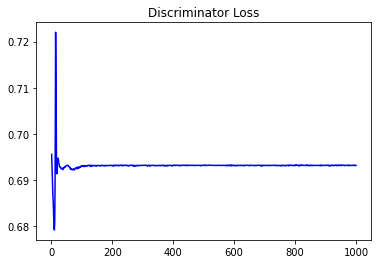

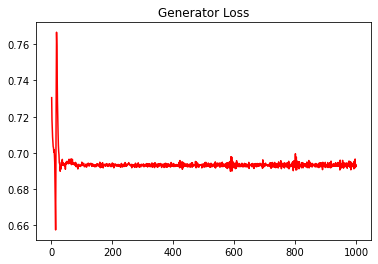

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16438023676255042


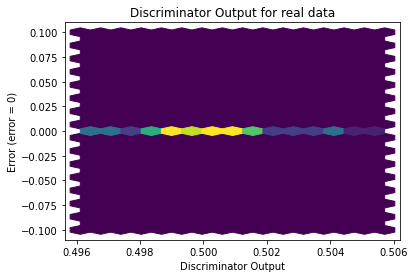

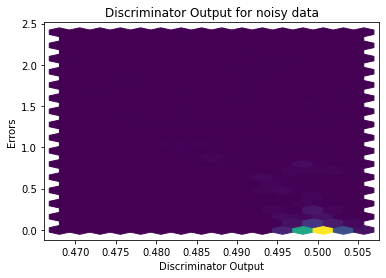

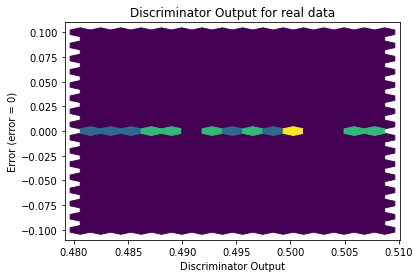

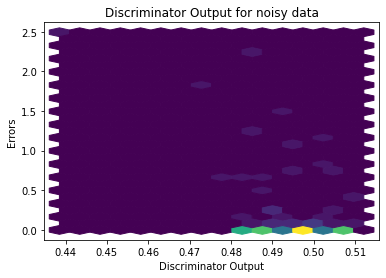

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


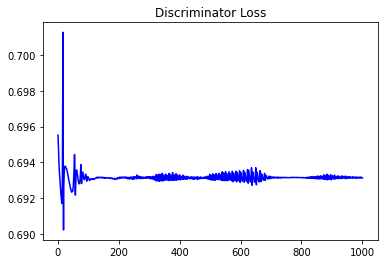

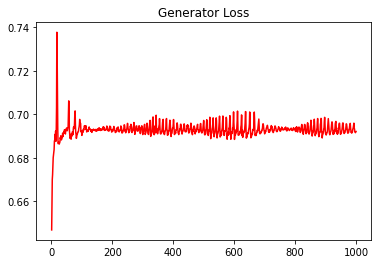

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20604374806703726


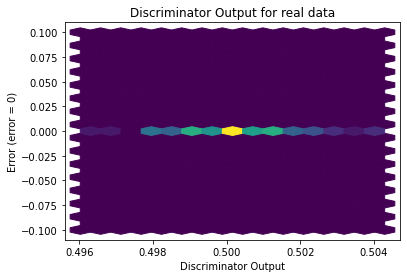

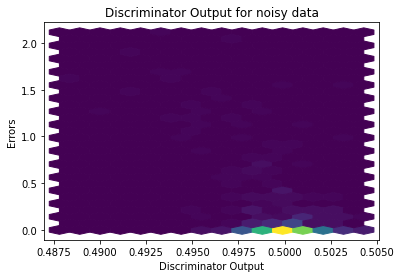

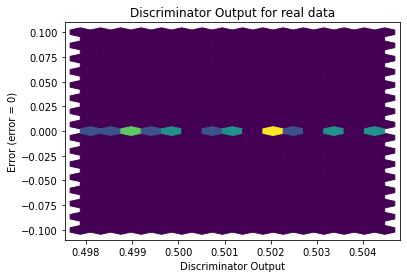

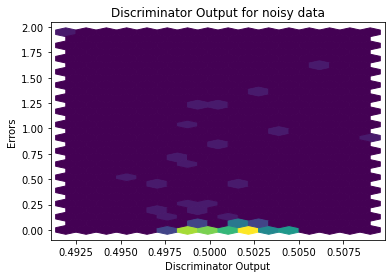

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0292]], requires_grad=True)
